In [1]:
# --- Import Libraries ---
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

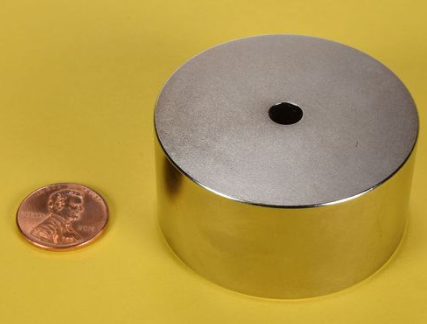
- Dimensions: 2" od x 1/4" id x 1" thick
- Tolerances: ±0.004" x ±0.004" x ±0.004"
- Material: NdFeB, Grade N42
- Plating/Coating: Ni-Cu-Ni (Nickel)
- Magnetization Direction: Axial (Poles on Flat Ends)
- Weight: 13.4 oz. (380 g)
- Pull Force, Case 1: 205.3 lbs
- Pull Force, Case 2: 205.3 lbs
- Max Operating Temp: 176ºF (80ºC)
- Brmax: 13,200 Gauss
- BHmax: 42 MGOe

In [2]:
# --- Magnet Specifications ---
OD = 2 * 0.0254             # Outer diameter (meters)
ID = 0.25 * 0.0254          # Inner diameter (meters)
THICKNESS = 1 * 0.0254      # Thickness (meters)

TOLERANCE = 0.004 * 0.0254 # Tolerance (meters)

BR = 1.32                   #  Remanence (Tesla) (13,200 Gauss converted to Tesla)
MU0 = 4*np.pi*1e-7          # Vacuum Permeability
M = BR/MU0                  # Magnetization in A/m

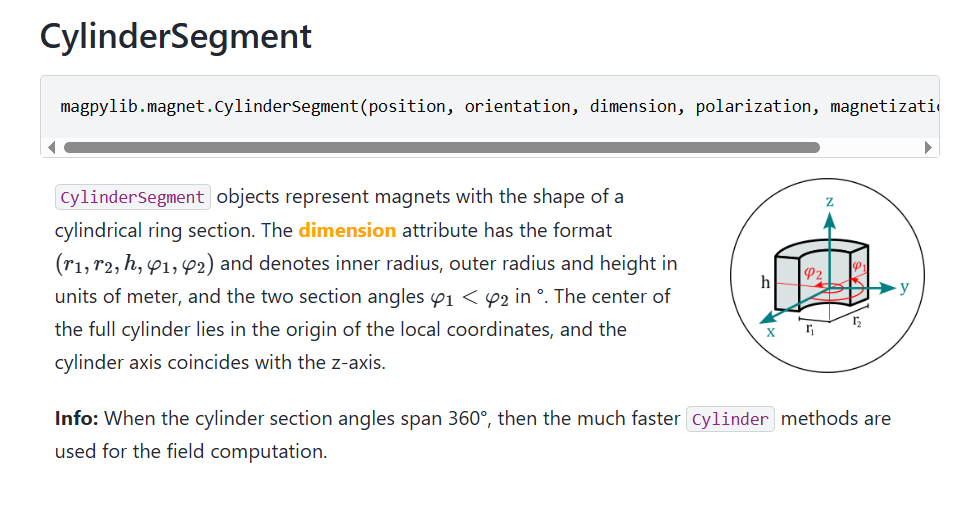

In [3]:
# --- Create the Ring Magnet ---
# dimensions = (ID/2,OD/2,THICKNESS,0,360)

ring_magnet = magpy.magnet.CylinderSegment(position=(0, 0, 0), dimension=(ID/2,OD/2,THICKNESS,0,360), magnetization=(0, 0, M))

Magnetic Field at observation points (Tesla):
  Position [0. 0. 0.]: B = [ 0.          0.         -0.69026615]
  Position [0.         0.         0.00204082]: B = [ 0.          0.         -0.69106321]
  Position [0.         0.         0.00408163]: B = [ 0.          0.         -0.69191758]
  Position [0.         0.         0.00612245]: B = [ 0.          0.         -0.68677508]
  Position [0.         0.         0.00816327]: B = [ 0.          0.         -0.65825787]
  Position [0.         0.         0.01020408]: B = [ 0.          0.         -0.55510958]
  Position [0.        0.        0.0122449]: B = [ 0.          0.         -0.27408829]
  Position [0.         0.         0.01428571]: B = [0.         0.         0.07888998]
  Position [0.         0.         0.01632653]: B = [0.         0.         0.24389148]
  Position [0.         0.         0.01836735]: B = [0.         0.         0.28645342]
  Position [0.         0.         0.02040816]: B = [0.         0.         0.28526229]
  Position [0.

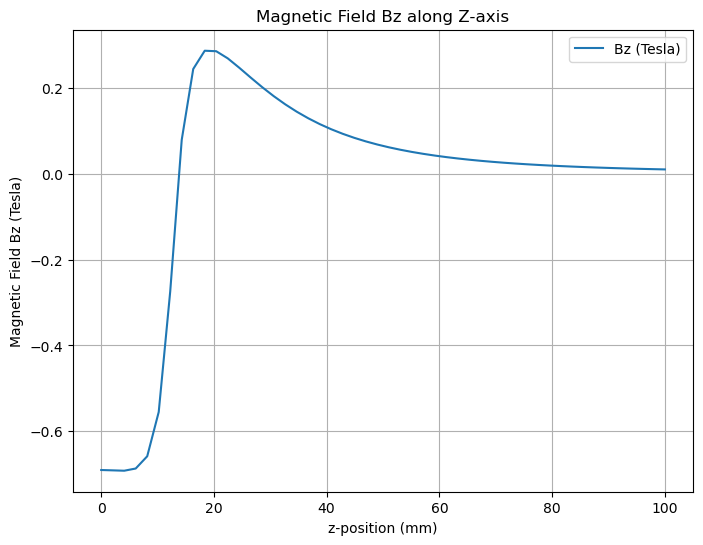

In [4]:
# --- Define Observation Points ---
# Create a grid of points where the magnetic field will be calculated.
# A line along the z-axis (axial direction)

z_positions = np.linspace(0, 0.1, 50) # from 0 to 0.1 meters, 50 points
obs_pos = np.array([(0, 0, z) for z in z_positions]) # (x, y, z) coordinates

# --- Calculate the Magnetic Field ---
B = ring_magnet.getB(obs_pos)  # Calculate the magnetic field at the observation points

# --- Display Results ---
print("Magnetic Field at observation points (Tesla):")
for i, b in enumerate(B):
    print(f"  Position {obs_pos[i]}: B = {b}")


# --- Optional: Visualize the magnetic field ---
# requires matplotlib
try:
    # Plot the magnetic field strength (Bz component) along the z-axis
    plt.figure(figsize=(8, 6))
    plt.plot(z_positions*1000, B[:, 2], label='Bz (Tesla)') # z-positions in mm
    plt.xlabel('z-position (mm)')
    plt.ylabel('Magnetic Field Bz (Tesla)')
    plt.title('Magnetic Field Bz along Z-axis')
    plt.grid(True)
    plt.legend()
    plt.show()

except ImportError:
    print("Matplotlib not installed.  Skipping visualization.")

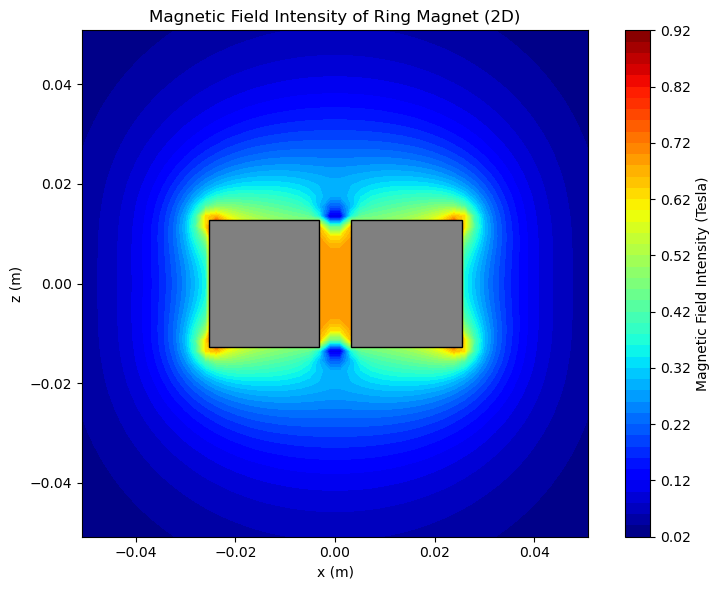

In [5]:
# --- Define Observation Points for 2D Plot ---
# Create a grid of points in the x-z plane
x = np.linspace(-OD, OD, 50)  # Adjust range and density as needed
z = np.linspace(-2*THICKNESS, 2*THICKNESS, 50) # Adjust range and density as needed
x, z = np.meshgrid(x, z)
y = np.zeros_like(x)  # Set y-coordinate to 0 (2D plane)

# Combine x, y, and z coordinates into a single array of observation points
obs_pos = np.stack((x, y, z), axis=-1)
obs_pos = obs_pos.reshape(-1, 3)  # Reshape to (N, 3)

# --- Calculate the Magnetic Field ---
B = ring_magnet.getB(obs_pos)  # Calculate the magnetic field at the observation points

# Calculate the magnitude of the magnetic field at each point
B_magnitude = np.linalg.norm(B, axis=1)

# Reshape B_magnitude back to the grid shape
B_magnitude = B_magnitude.reshape(x.shape)

# --- Plot the Magnetic Field Intensity (Contour Plot) ---
plt.figure(figsize=(8, 6))
contour = plt.contourf(x, z, B_magnitude, levels=50, cmap='jet') # Use contourf for filled contours
plt.colorbar(contour, label='Magnetic Field Intensity (Tesla)')  # Add a colorbar

# Add magnet geometry (approximate) -  Draw rectangles to represent the magnet
rect_outer_left = plt.Rectangle((-OD/2, -THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')
rect_outer_right = plt.Rectangle((ID/2, -THICKNESS/2), OD/2-ID/2, THICKNESS, linewidth=1, edgecolor='k', facecolor='gray')

plt.gca().add_patch(rect_outer_left)
plt.gca().add_patch(rect_outer_right)

plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.title('Magnetic Field Intensity of Ring Magnet (2D)')
plt.xlim(-OD, OD)
plt.ylim(-2*THICKNESS, 2*THICKNESS) # Adjust limits as needed
plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
plt.tight_layout()
plt.show()